## Лабораторная работа 1

Визуализация данных

Выполнил: 6132-010402D, Рудинская Елизавета Андреевна

0. Загружаем в pandas любой набор данных, в котором есть как минимум пара числовых колонок и как минимум одна категориальная с небольшим числом категорий. Опишите ваши данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import probplot

In [4]:
# Считывание датасета
df = pd.read_csv("student-mat.csv")
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


### Описание датасета
#### Атрибуты для наборов данных student-mat.csv (курс математики) и student-por.csv (курс португальского языка):

school - школа ученика (бинарный: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 

sex - пол студента (бинарный: 'F' - женский or 'M' - мужской)

age - возраст студента (значения: от 15 до 22)

address -тип домашнего адреса студента (бинарный: 'U' - городской or 'R' - сельский)

famsize - размер семьи (бинарный: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - статус совместного проживания родителей (бинарный: 'T' - живут вместе или 'A' - раздельно)

Medu - образование матери  (значения: 0 - нет, 1 - начальное образование (4 класса), 2 – с 5 по 9 класс, 3 – среднее образование или 4 - высшее образование)

Fedu - образование отца  (значения: 0 - нет, 1 - начальное образование (4 класса), 2 – с 5 по 9 класс, 3 – среднее образование или 4 - высшее образование)

Mjob - работа матери (номинальный: 'учитель', 'здоровье' связанные со здравоохранением, гражданские "службы" (например, административные или полицейские), 'дома' или 'другое')

Fjob - работа отца (номинальный: 'учитель', 'здоровье' связанные со здравоохранением, гражданские "службы" (например, административные или полицейские), 'дома' или 'другое')

reason - причина выбора данной школы (номинальный: близость к  'дому', школьная 'репутация', предпочтение 'курс' или 'другое')

guardian - опекун студента (номинальный: 'мать', 'отец' или 'другое')

traveltime - время в пути от дома до школы (значения: 1 - <15 мин., 2 - от 15 до 30 мин., 3 - от 30 мин. до 1 ч, или 4 - >1 ч)

studytime - еженедельное учебное время (значения: 1 - <2 часов, 2 - от 2 до 5 часов, 3 - от 5 до 10 часов, или 4 - >10 часов)

failures - количество неудач в прошлом классе (значения: n если 1 <= n <3, иначе 4)

schoolsup - дополнительная образовательная поддержка (бинарный: да или нет)

famsup - педагогическая поддержка семьи (бинарный: да или нет)

paid - дополнительные платные занятия в рамках предмета курса (Математика или Португальский язык) (бинарный: да или нет)

activities - внеклассные мероприятия (бинарный: да или нет)

nursery - посещеал ли детский сад (бинарный: да или нет)

higher - хочет получить высшее образование (бинарный: да или нет)

internet - Доступ в Интернет дома (бинарный: да или нет)

romantic - с романтическими отношениями (бинарный: да или нет)

famrel - качество семейных отношений (значения: от 1 - очень плохо до 5 - отлично)

freetime - свободное время после школы (значения: от 1 - очень низкий до  5 - очень высокий)

goout - прогулки с друзьями (значения: от 1 - очень низкий до  5 - очень высокий)

Dalc - употребление алкоголя в течение рабочего дня (значения: от 1 - очень низкий до  5 - очень высокий)

Walc - употребление алкоголя в выходные дни (значения: от 1 - очень низкий до  5 - очень высокий)

health - текущее состояние здоровья (значения: от 1 - очень плохо до 5 - очень хорошо)

absences - количество пропусков занятий (значения: от 0 до 93)


### Оценки, связанные с предматами: математика или португальский язык

G1 - оценка за первый период (значения: от 0 до 20)

G2 - оценка за второй период (значения: от 0 до 20)

G3 - финальная оценка (значения: от 0 до 20, выходной показатель)


1. Matplotlib

1.1 Построить любой график (любого рода) с помощью чистого matplotlib / pylab

Text(0.5, 1.0, 'Гистограмма возрастов')

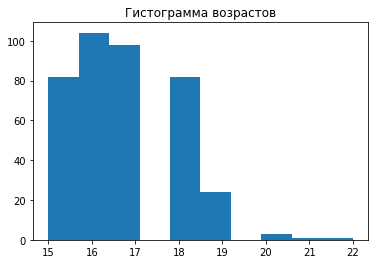

In [7]:
plt.hist(df['age'])
plt.title("Гистограмма возрастов")

1.2 Построить несколько суб-графиков на одном графике используя .subplot.

Графики должны быть разных типов и хотя бы два из них должны быть связаны с вашим датасетом. Хотя бы в одном графике подпишите оси. Во всех графиках подписать название графика.

Text(0, 0.5, 'Возраст (age)')

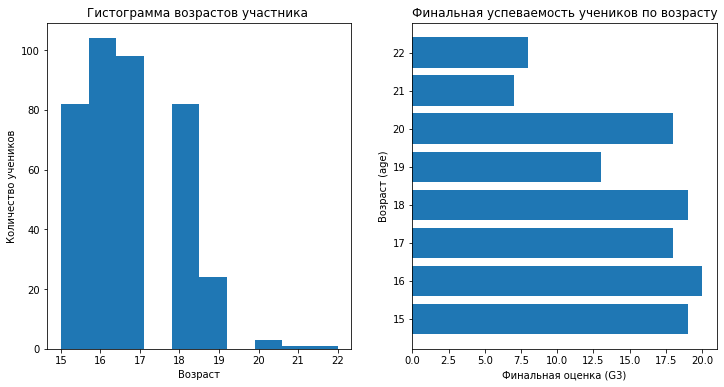

In [12]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.hist(df['age'])
ax1.set_title('Гистограмма возрастов участника ')
ax1.set_xlabel('Возраст')
ax1.set_ylabel('Количество учеников')

ax2.barh(df.age,df.G3)
ax2.set_title('Финальная успеваемость учеников по возрасту')
ax2.set_xlabel('Финальная оценка (G3)')
ax2.set_ylabel('Возраст (age)')

2. На основе Вашего датасета построить три разных вида графиков используя pandas.DataFrame.plot / Series.plot (мануал) Среди графиков должен присутствовать один boxplot (обязательно надо использовать параметр by, для исследования взаимосвязи числовой переменной и какой-либо другой). Графики должны быть построены как через методы DataFrame, так и через методы Series. То есть оба варианта нужно продемонстрировать.

<AxesSubplot:ylabel='Density'>

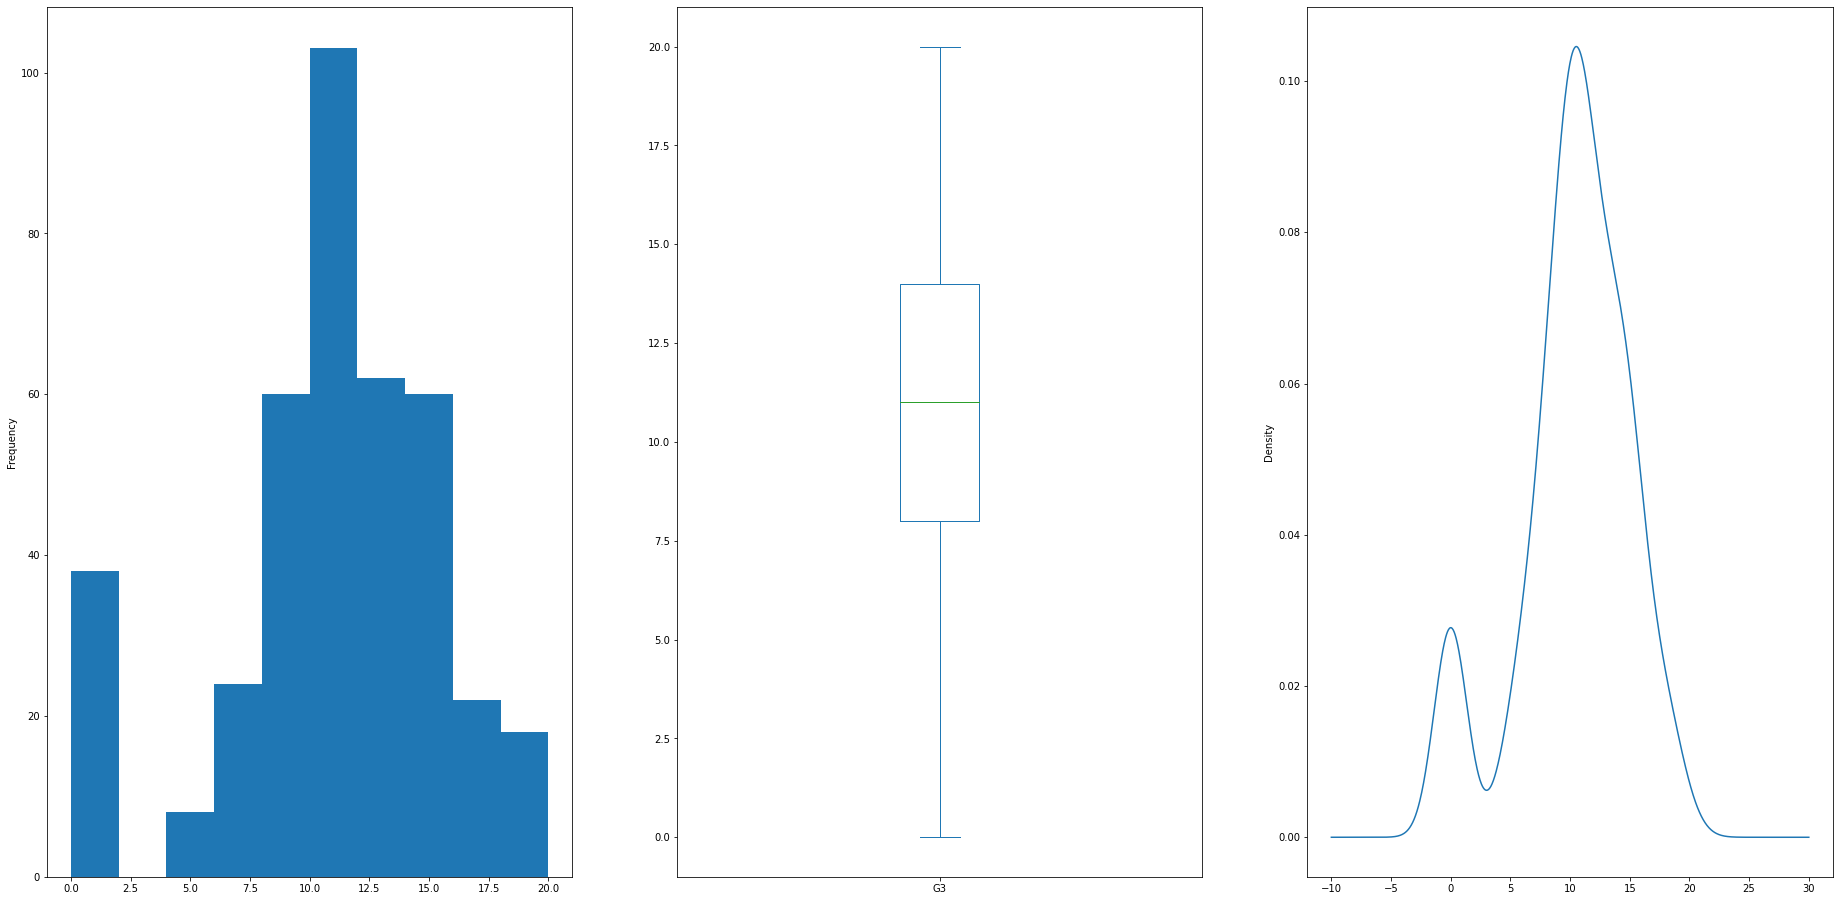

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(32, 16))
df_G3=df.G3
df_G3.plot(y='G3', kind='hist', ax=ax1)
df_G3.fillna(0).plot(y=[1,6,7,9,10,11], kind='box', ax=ax2)
df_G3.plot.kde(y='age', ax=ax3)


3. Seaborn

3.1 Построить .pairplot с помощью seaborn на каком-либо наборе данных, проанализировав взаимосвязь набора числовых переменных

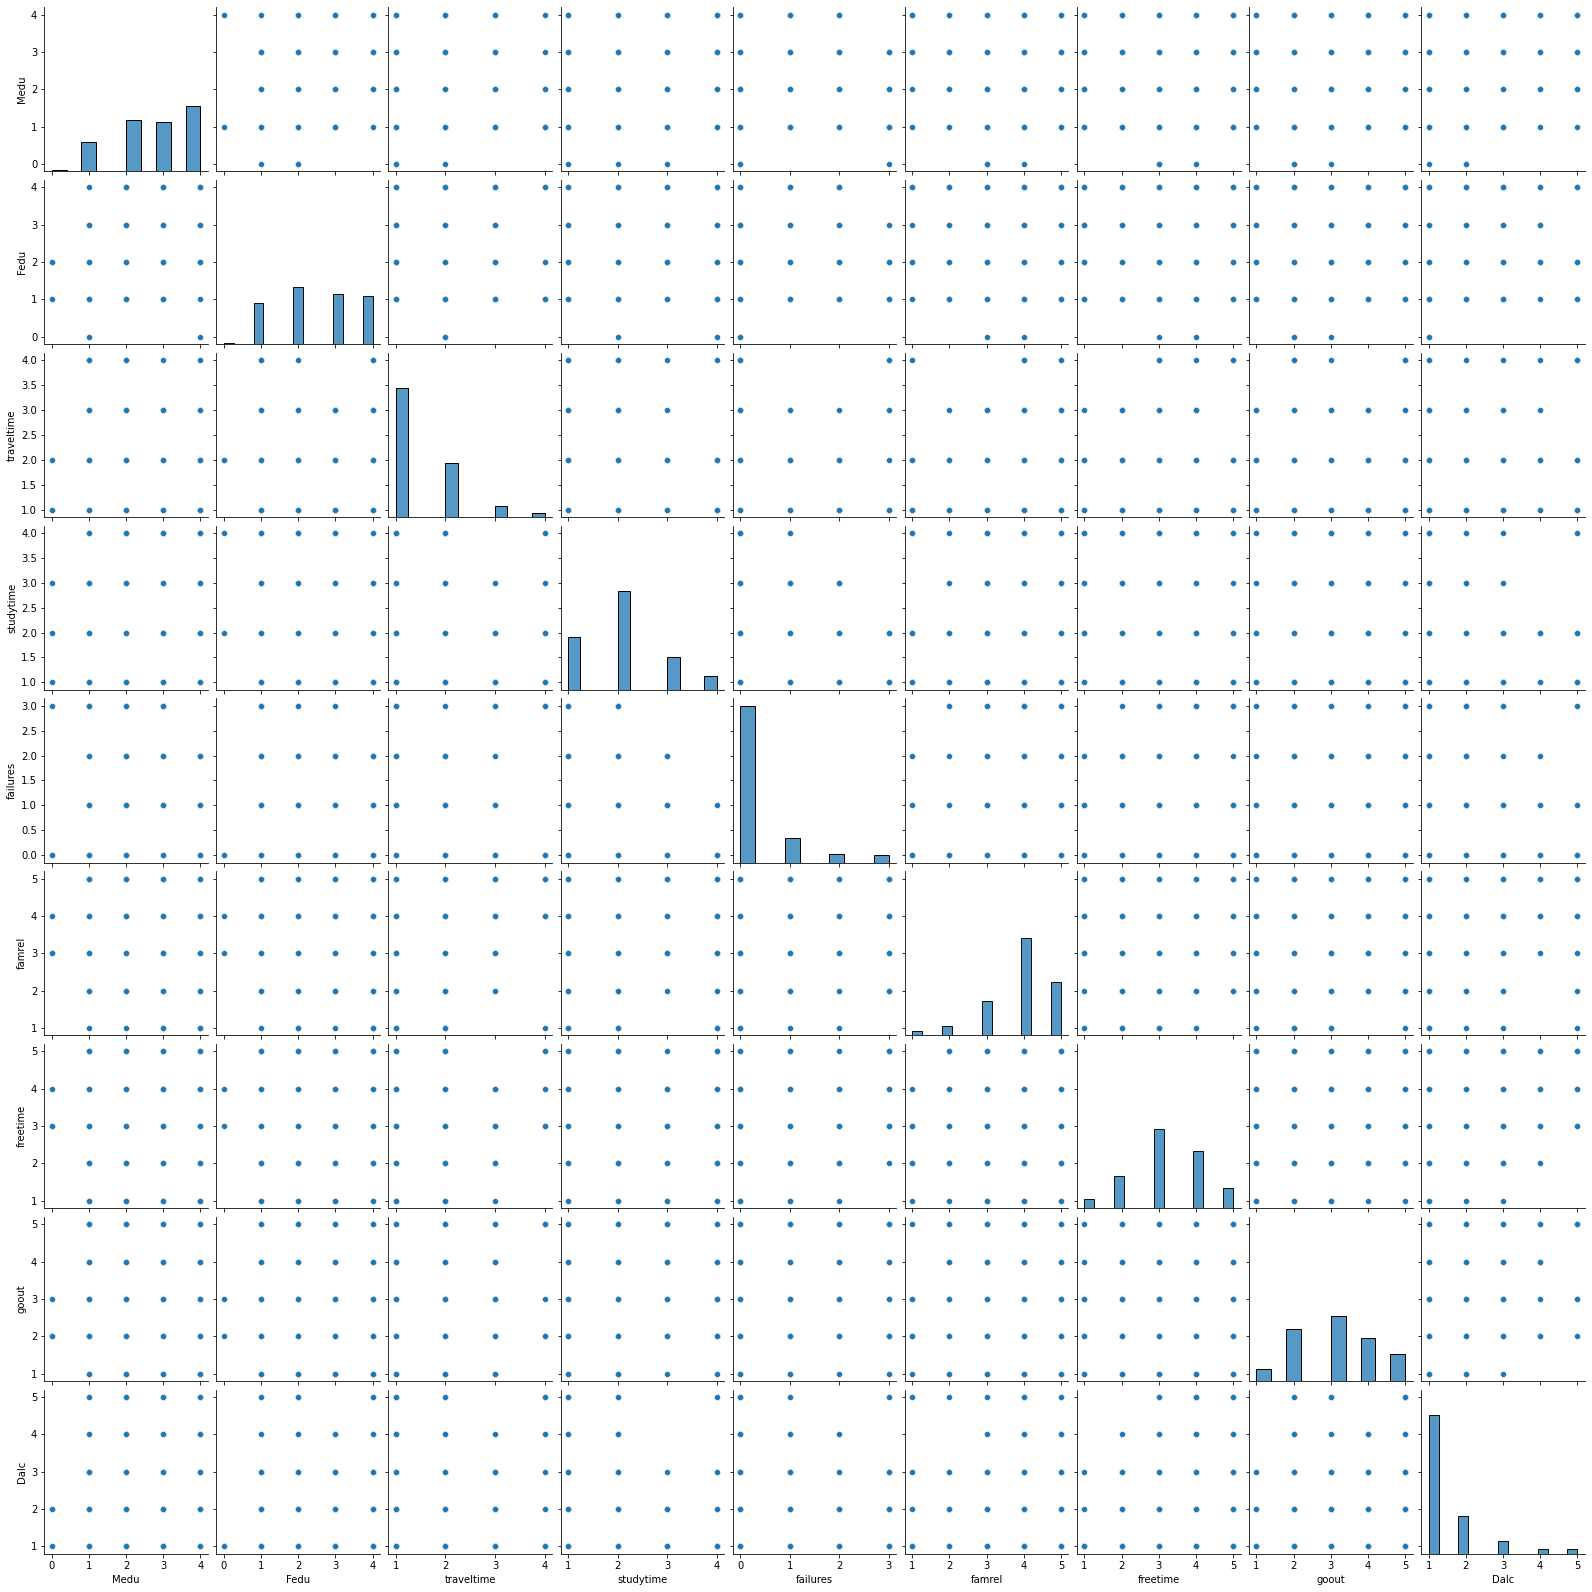

In [29]:
sns.pairplot(df.iloc[::, 6:-6])

3.2 Построить .jointplot, проанализировав взаимосвязь двух конкретных числовых переменных

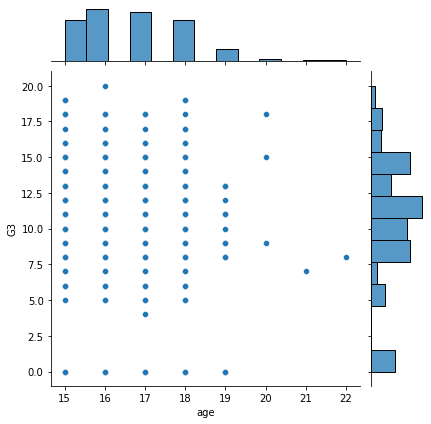

In [32]:
sns.jointplot(x='age', y='G3', data=df)

3.3 Построить .boxplot или .violinplot на каком-либо наборе данных, проанализировав какой-то числовой показатель в разрезе категориального

<AxesSubplot:xlabel='age', ylabel='G3'>

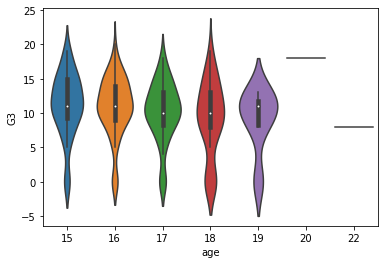

In [33]:
sns.violinplot(x='age', y='G3', data=df.loc[df['school'] == 'GP'])

3.4 Построить график heatmap попарной корреляции всех числовых признаков (категориальные признаки убираете из графика)

<AxesSubplot:>

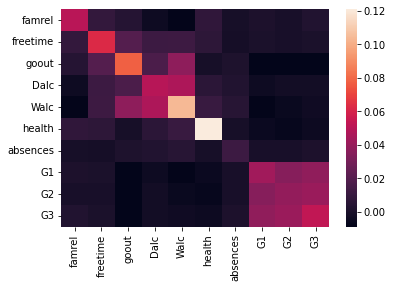

In [44]:
# создаем копию датасета только с числовыми столбцами
df1 = df[[ 'famrel',	'freetime',	'goout',	'Dalc',	'Walc',	'health',	'absences', 'G1', 'G2', 'G3']].copy()
df1
sns.heatmap(df1.apply(lambda x: ((x - x.min())/(x.max() - x.min())), axis=0).cov())

4. Построить QQ-график (и гистограмму) для одного из числовых признаков с целью проверки на соответствие его распределения нормальному распределению

((array([-2.91944715, -2.63109107, -2.46845584, -2.35288576, -2.26216885,
         -2.18695801, -2.12239948, -2.06563642, -2.01483978, -1.96876523,
         -1.92652644, -1.88746887, -1.85109487, -1.81701692, -1.78492711,
         -1.7545766 , -1.72576125, -1.69831147, -1.67208477, -1.64696022,
         -1.62283426, -1.59961753, -1.57723234, -1.55561071, -1.53469279,
         -1.51442563, -1.4947621 , -1.47566012, -1.4570819 , -1.43899341,
         -1.42136386, -1.40416533, -1.38737239, -1.37096182, -1.35491238,
         -1.33920455, -1.32382037, -1.30874328, -1.29395796, -1.27945022,
         -1.26520689, -1.2512157 , -1.23746525, -1.22394487, -1.2106446 ,
         -1.19755512, -1.18466766, -1.17197401, -1.15946644, -1.14713767,
         -1.13498085, -1.12298949, -1.11115747, -1.09947899, -1.08794858,
         -1.07656102, -1.06531139, -1.05419498, -1.04320734, -1.03234422,
         -1.02160158, -1.01097556, -1.00046249, -0.99005884, -0.97976127,
         -0.96956655, -0.95947162, -0.

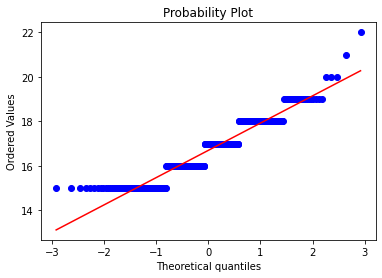

In [46]:
probplot(df['age'].fillna(0), dist="norm", plot=plt)

5. Построить любой график (связанный с вашими данными) с помощью plotly

In [47]:
px.histogram(df, x='age')